#### Impedindo notebook de escrever bytecode

In [21]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [22]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [23]:

from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier
from random import choices
import pandas as pd
import matplotlib.pyplot as plt

#### Lendo dataset

In [24]:
dataset = PointDataset("./data.dat")
points = dataset.getPoints()

#### Criando instância do classificador baseado em envoltória convexa para as features (0, 1)

In [25]:
CHclf01 = ConvexHullClassifier(points, coordinate1=0, coordinate2=1, nFolds=5)
CHresults01 = CHclf01.run()

#### Plotando classificador

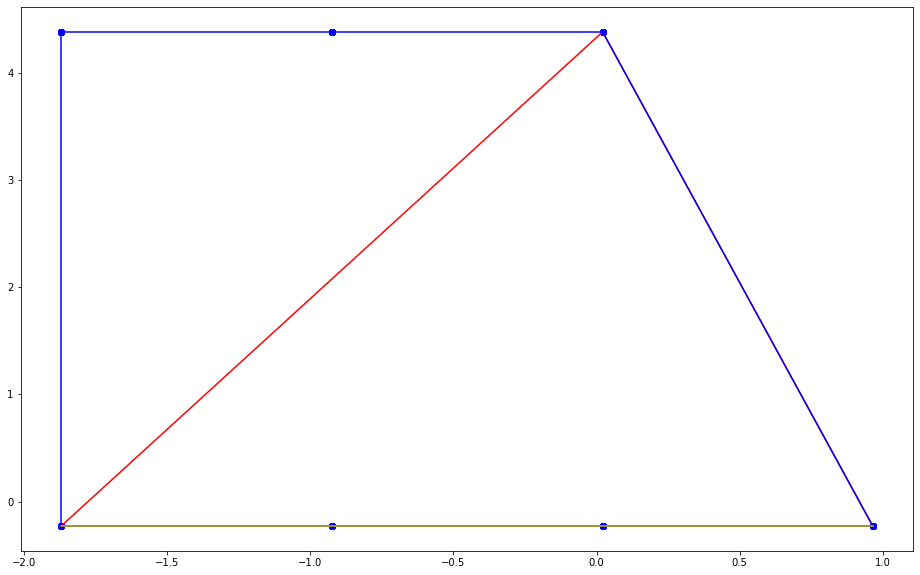

In [26]:
CHclf01.plotHulls()

#### Verificando separabilidade linear dos pontos

In [27]:
CHclf01.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [28]:
CHresults01["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.344156,1.0,0.344156,0.344156
1,0.366883,1.0,0.366883,0.366883
2,0.308442,1.0,0.308442,0.308442
3,0.305195,1.0,0.305195,0.305195
4,0.311688,1.0,0.311688,0.311688


#### Resultados do teste

In [29]:
CHresults01["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.313162,1.0,0.313162,0.313162


#### Criando instância do classificador baseado em envoltória convexa para as features (0, 2)

In [30]:
CHclf02 = ConvexHullClassifier(points, coordinate1=0, coordinate2=2, nFolds=5)
CHresults02 = CHclf02.run()

#### Plotando classificador

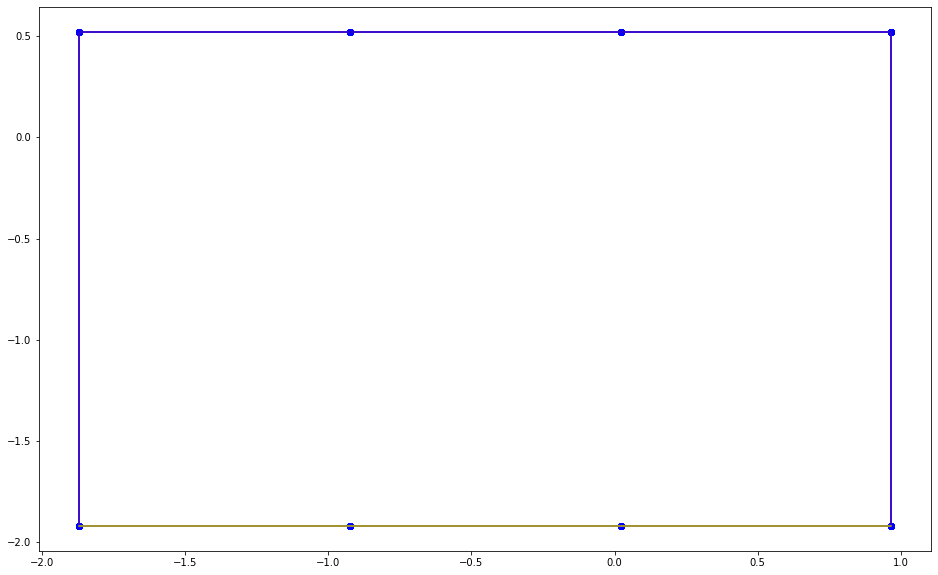

In [31]:
CHclf02.plotHulls()

#### Verificando separabilidade linear dos pontos

In [32]:
CHclf02.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [33]:
CHresults02["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.305195,1.0,0.305195,0.305195
1,0.295455,1.0,0.295455,0.295455
2,0.331169,1.0,0.331169,0.331169
3,0.327922,1.0,0.327922,0.327922
4,0.318182,1.0,0.318182,0.318182


#### Resultados do teste

In [34]:
CHresults02["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.340393,1.0,0.340393,0.340393


#### Criando instância do classificador baseado em envoltória convexa para as features (1, 2)

In [35]:
CHclf12 = ConvexHullClassifier(points, coordinate1=1, coordinate2=2, nFolds=5)
CHresults12 = CHclf12.run()

#### Plotando classificador

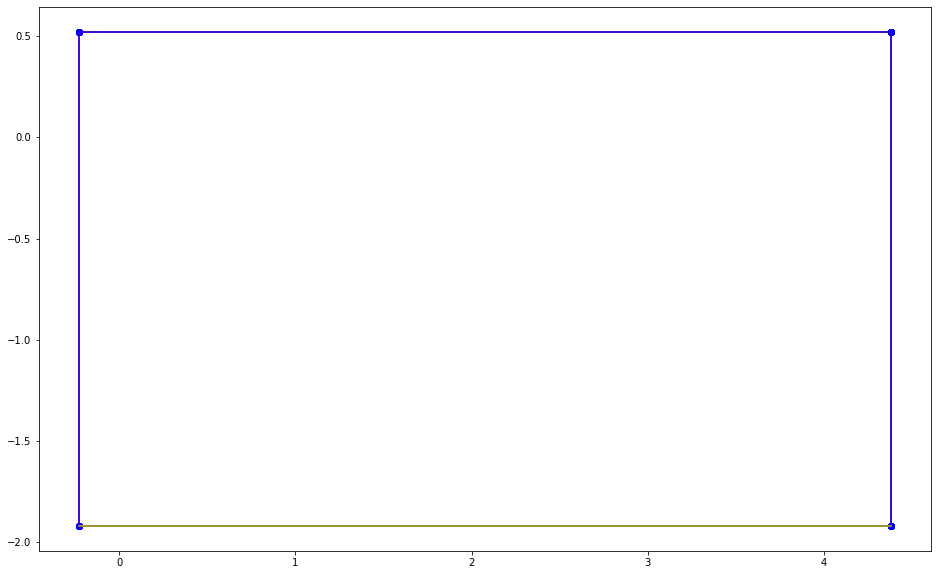

In [36]:
CHclf12.plotHulls()

#### Verificando separabilidade linear dos pontos

In [37]:
CHclf12.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [38]:
CHresults12["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.331169,1.0,0.331169,0.331169
1,0.327922,1.0,0.327922,0.327922
2,0.314935,1.0,0.314935,0.314935
3,0.331169,1.0,0.331169,0.331169
4,0.360390,1.0,0.360390,0.360390


#### Resultados do teste

In [39]:
CHresults12["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.299546,1.0,0.299546,0.299546


#### Criando instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [40]:
KNNclf = KNNClassifier(points, maxK=30, nFolds=5)
KNNresults = KNNclf.run()

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \


#### Resultados da validação cruzada com 5 folds

In [41]:
KNNresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.666667,0.473118,0.666667,0.769481
1,0.900000,0.333333,0.900000,0.753247
2,0.925000,0.359223,0.925000,0.775974
3,0.947368,0.371134,0.947368,0.795455
4,0.918919,0.333333,0.918919,0.769481


#### Resultados do teste

In [42]:
KNNresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.581897,0.649038,0.581897,0.742814
